In [1]:
#magic line that lets you see plots without calling them
%matplotlib inline
#import matplot lib style
from matplotlib import style
#import this specific style from matplotlib
style.use('fivethirtyeight')

#import matplot lib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
#sqlalchemy is a tool to query a sql database
import sqlalchemy

#also adding dependencies for session, create_engine, and func to help set up a database later on
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
#creating engine and connecting to sqlite through connection string
#primary purpose: set up ability to query sqlite database
engine=create_engine("sqlite:///hawaii.sqlite")

#Automap Base creates a base class for an automap schema in SQLAlchemy
#basically sets up foundation for us to build on in sqlalchemy
Base = automap_base()

#reflect (essentially copy) tables with prepare() function
#reflecting existing database into new model (transforming structure of database contents into classes, not tables)
#this code will help reflect schema of sqlite tables and create mappings
Base.prepare(engine, reflect=True)

#make some classes with automap()
#make sure that automap found all data in the sqlite database
#base.classes gives classes, .keys() gives names of classes
#classes help keep data seperated/decoupled. Data is no longer in tables, it's in classes
Base.classes.keys()

#giving code referencing the classes variable names so they're easier to reference 
Measurement = Base.classes.measurement
Station = Base.classes.station

#create session link to database (this lets us query the database)
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

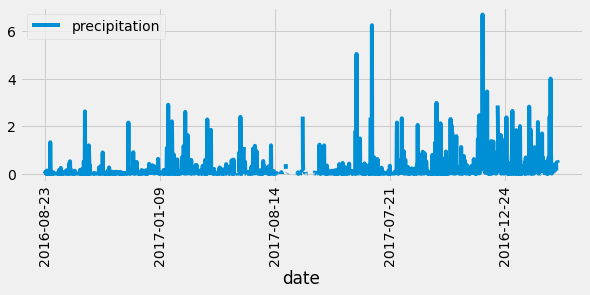

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
#dt.timedelta helps trace back a certain number of days (to august 23, 2016)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores:
#stores results of query
results = []
#each query starts with session.query, filter by just certain dates, then .all() displays results from query
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=prev_year).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column
#columns parameter tells pandas what to name columns
df = pd.DataFrame(results, columns=["date", "precipitation"])
df

# Sort the dataframe by date
df.sort_values(by=["date"])

#set the index to date instead of the row number. Inplace says not to make a copy of the dataframe
df.set_index(df["date"], inplace=True)
df

#how to print a dataframe without the index:
#print(df.to_string(index=False))


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, figsize=(9,3))

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [33]:
# How many stations are available in this dataset?
#func.count() counts a given data set 
session.query(func.count(Station.station)).all()

#results show that there are 9 stations collecting weather data

[(9,)]

In [49]:
# What are the most active stations? (most active have recorded the most measurements)

# List the stations and the counts in descending order.
#query data, ask for the stations, a count of number of measurements at stations, and group by each station
#then groupby the stations and list them in descending order. the slashes let the code be on different lines
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#because it's a filter, use logical operators ==

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station=="USC00519281")\
    .all()


#all the columns I've been able to figure out are there:
#measurement class has station, date, precipitation amount, temperature observations (tobs)
#station class has list of stations

[(54.0, 85.0, 71.66378066378067)]

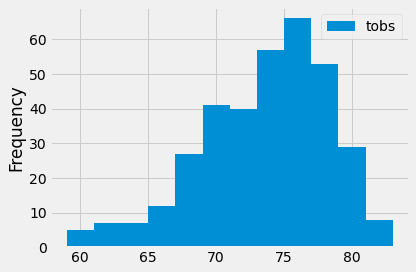

In [84]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs)\
    .filter(Measurement.station=="USC00519281", Measurement.date >= prev_year)\
    .all()

df=pd.DataFrame(results, columns=["tobs"])
df

#plotting dataframe into a histogram with 12 bins (good practice is somewhere between 5 and 20 bins)
df.plot.hist(bins=12)
#this compresses x labels so they fit into the box holding the plot
plt.tight_layout()


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge